In [31]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # GRIDSPEC !
%matplotlib inline

## Load trajectories

Load the MM trajectory and check that: 

- The number of frames (5001)
- The number of atoms (4380)
- The number of residues (1458)

are the expected values of your system. 

In [32]:
mmtraj = md.load('../section2/CP2K/NPT-pos-1.dcd', top='../section2/CP2K/NMA.pdb')

In [33]:
print(mmtraj)

<mdtraj.Trajectory with 5001 frames, 4380 atoms, 1458 residues, and unitcells>


Repeat this operation for the QM/MM trajectory

In [34]:
qmmmtraj = md.load('../section3/CP2K/MD_QMMM-pos-1.dcd', top='../section3/CP2K/NMA.pdb')

In [35]:
print(qmmmtraj)

<mdtraj.Trajectory with 5001 frames, 4380 atoms, 1458 residues, and unitcells>


### Analysis of the O-C-N-H tosion 

To calculate dihedral angles in MDtraj, we use the method: `mdtraj.compute_dihedrals(traj, indices, periodic=True, opt=True)`

For more information, see: http://mdtraj.org/1.9.3/api/generated/mdtraj.compute_dihedrals.html#mdtraj.compute_dihedrals

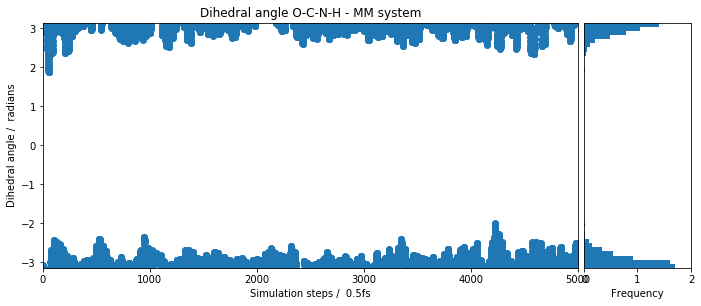

<Figure size 432x288 with 0 Axes>

In [36]:
mm_dihe = md.compute_dihedrals(mmtraj, np.array([[5, 4, 6, 7]]))

fig = plt.figure(1, figsize=(10,4))
# Now, create the gridspec structure, as required
gs = gridspec.GridSpec(1,2, height_ratios=[1], width_ratios=[1,0.2])
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

# Set plot 1
ax1 = plt.subplot(gs[0,0])
ax1.set_title("Dihedral angle O-C-N-H - MM system")


ax1.plot(mm_dihe, "o")
ax1.set_ylim(-3.14 ,3.14)
ax1.set_xlim(0 ,5000)
ax1.set_xlabel("Simulation steps /  0.5fs")
ax1.set_ylabel("Dihedral angle /  radians")

# Set plot 2
ax2 = plt.subplot(gs[0,1])
ax2.hist(mm_dihe, bins=60, orientation="horizontal", density=True,  range=[-3.14 ,3.14]);
ax2.set_ylim(-3.14 ,3.14)
ax2.set_xlim(0 ,2)
ax2.set_yticks([] )
ax2.set_xlabel("Frequency")

plt.show()

plt.savefig("mm.dihedral.png")

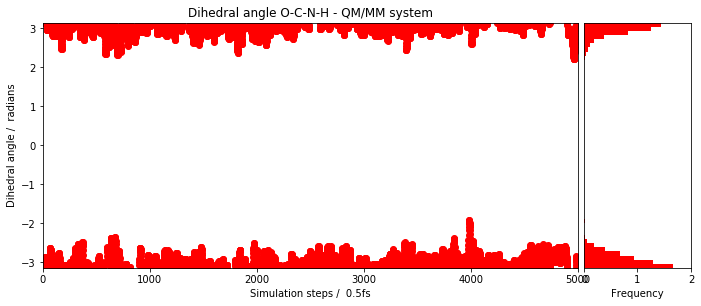

<Figure size 432x288 with 0 Axes>

In [37]:
qmmm_dihe = md.compute_dihedrals(qmmmtraj, np.array([[5, 4, 6, 7]]))

fig = plt.figure(1, figsize=(10,4))
# Now, create the gridspec structure, as required
gs = gridspec.GridSpec(1,2, height_ratios=[1], width_ratios=[1,0.2])
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

# Set plot 1
ax1 = plt.subplot(gs[0,0])
ax1.set_title("Dihedral angle O-C-N-H - QM/MM system")

ax1.plot(qmmm_dihe, "ro")
ax1.set_ylim(-3.14 ,3.14)
ax1.set_xlim(0 ,5000)
ax1.set_xlabel("Simulation steps /  0.5fs")
ax1.set_ylabel("Dihedral angle /  radians")

# Set plot 2
ax2 = plt.subplot(gs[0,1])
ax2.hist(qmmm_dihe, bins=60, orientation="horizontal", density=True,  range=[-3.14 ,3.14], color="r");
ax2.set_ylim(-3.14 ,3.14)
ax2.set_xlim(0 ,2)
ax2.set_yticks([] )
ax2.set_xlabel("Frequency")

plt.show()

plt.savefig("qmmm.dihedral.png")

Text(0.5,0,'Dihedral angle /  radians')

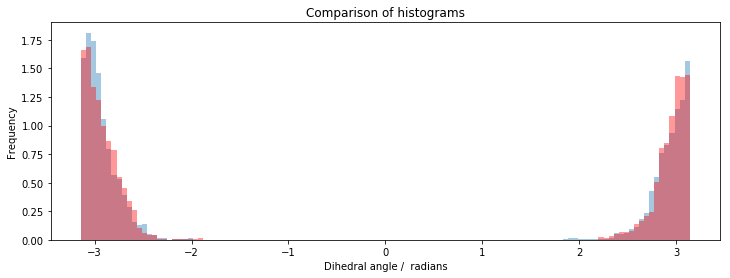

In [38]:
fig = plt.figure(1, figsize=(12,4))

plt.title("Comparison of histograms")
plt.hist(mm_dihe, bins=120, density=True,  range=[-3.14 ,3.14], alpha=0.4)
plt.hist(qmmm_dihe, bins=120, density=True,  range=[-3.14 ,3.14], color="r", alpha=0.4)

plt.ylabel("Frequency")
plt.xlabel("Dihedral angle /  radians")